Importação das bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Carregamento dos dados

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Normalizando eles de 0 até 1

In [6]:
x_train, x_test = x_train / 255, x_test / 255
x_train.shape

(60000, 28, 28)

Adicionando uma dimensão a mais

In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

Quantidades de objetos dentro do dataset

In [8]:
K = len(set(y_train))
K

10

In [9]:
i = Input(shape=x_train[0].shape) #camada de entrada
x = Conv2D(32, (3,3), strides = 2, activation = 'relu') (i) #camada de convolução 
x = Conv2D(64, (3,3), strides = 2, activation = 'relu') (x) #camada de convolução
x = Conv2D(128, (3,3), strides = 2, activation = 'relu') (x) #camada de convolução
x = Flatten()(x) #Deixar em uma dimensão
x = Dropout(0.2)(x) #evitar overfitting
x = Dense(512, activation = 'relu')(x) #Camada densa
x = Dropout(0.2)(x) #evitar overfitting
x = Dense(K, activation = 'softmax')(x) #camada de saída

model = Model(i,x)

In [10]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 5)

AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5104 - loss: 1.2910 - val_accuracy: 0.7431 - val_loss: 0.6750
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7484 - loss: 0.6708 - val_accuracy: 0.7838 - val_loss: 0.5814
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7779 - loss: 0.5864 - val_accuracy: 0.7998 - val_loss: 0.5357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7950 - loss: 0.5383 - val_accuracy: 0.8110 - val_loss: 0.5107
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8058 - loss: 0.5178 - val_accuracy: 0.8176 - val_loss: 0.4906


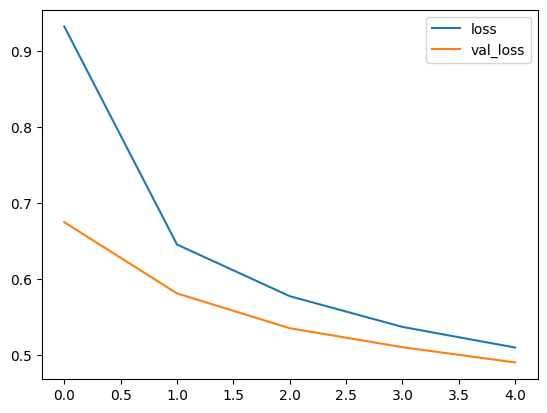

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

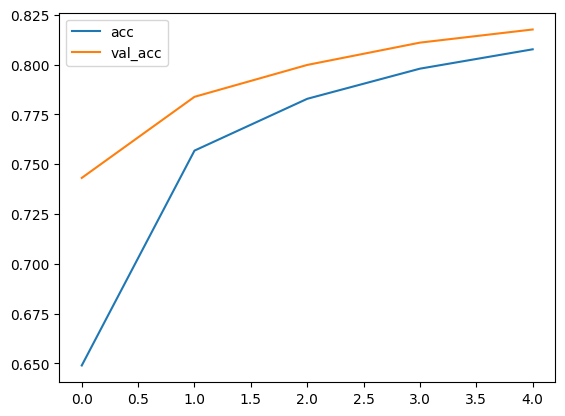

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Matriz de confusão

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
confusion matrix, without normalization
[[768   1  43  59   5   4 101   0  19   0]
 [  5 931   3  50   4   0   4   0   3   0]
 [ 12   0 720  17 168   0  70   0  13   0]
 [ 23   6  31 869  27   2  36   0   5   1]
 [  1   0 103  34 758   0  91   0  13   0]
 [  0   0   0   2   0 876   0  87   5  30]
 [161   0 156  36 174   2 428   0  43   0]
 [  0   0   0   0   0  15   0 941   1  43]
 [  1   1  14   5   1   6  12   4 955   1]
 [  1   0   0   0   0   7   0  62   0 930]]


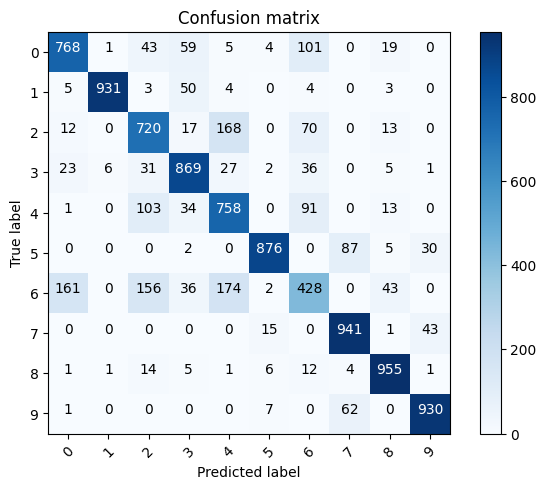

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Predição da rede neural que mostra um erro

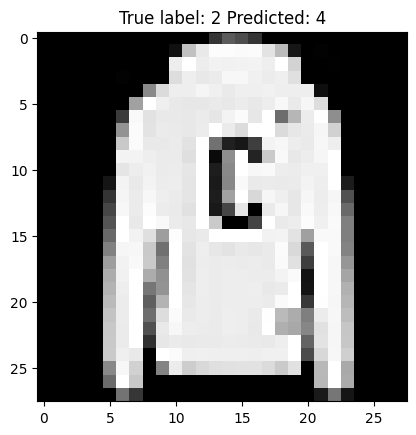

In [14]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));